# GRIP: The Sparks Foundation 
* Data Science & Business Analytics Internship

 ## Task 3: Exploratory Data Analysis- Retail
 ### Author: Bharti Rani

#### In this task 'Exploratory Data Analysis' will be performed on 'SampleSuperstore.csv' datasets. Being a 'Business Manager' I will try to find out the weeker areas & all business problems derived by exploring the data where needs to work for making more profits to the business.

### Steps to be followed:
* Importing the Libraries
* Reading the dataset
* Data pre-processing
* EDA
* Data Visualization & finding insights
* Conclusions

#### . Importing Necessary Libraries

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Extra
sns.set()
import warnings
warnings.filterwarnings('ignore')

#### Data Loading

In [2]:
df= pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

#### . Data pre-processing

In [4]:
df.shape

(9993, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [6]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9993.000000   9993.000000  9993.000000  9993.000000  9993.000000
mean   55186.627539    229.856670     3.789753     0.156218    28.652464
std    32063.103801    623.276273     2.225149     0.206456   234.271411
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728000
50%    56301.000000     54.480000     3.000000     0.200000     8.662000
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
# Chaecking the dupilication in data
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [12]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

In [13]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [14]:
#Deleting the Variable.
col=['Postal Code']
df=df.drop(columns=col,axis=1)

#### Continuous Variables
These are numerical columns like Postal Code, Sales, Quantity, Discount, Profit etc. 

#### Categorical Variables
These are columns contains categories like Ship Mode, Segment, Country, state etc

In [15]:
cont_cols=['Sales','Quantity','Discount','Profit']                                                #Continuous Columns
cat_cols=['Ship Mode','Segment','Country','City','State','Region','Category', 'Sub-Category']     # Categorical Columns

len(set(cont_cols))+len(set(cat_cols))

12

In [16]:
df.select_dtypes(include='number')

Sales  Quantity  Discount    Profit
0     261.9600         2      0.00   41.9136
1     731.9400         3      0.00  219.5820
2      14.6200         2      0.00    6.8714
3     957.5775         5      0.45 -383.0310
4      22.3680         2      0.20    2.5164
...        ...       ...       ...       ...
9988  206.1000         5      0.00   55.6470
9989   25.2480         3      0.20    4.1028
9990   91.9600         2      0.00   15.6332
9991  258.5760         2      0.20   19.3932
9992   29.6000         4      0.00   13.3200

[9976 rows x 4 columns]

In [17]:
df.select_dtypes(exclude='number')

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9988  Standard Class  Corporate  United States           Athens     Georgia   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   

     Region         Category Sub-Category  
0     South        Furniture    Bookcases  
1     South        Furniture       Chairs  
2      West  Office Supplies       Labels  
3     South        Furniture       Tables  
4     South  Office Supplies      Storage  
...     ...              ...          ...  
9988  South       Technology       Phones  
9989  South        Furniture  Furnishings  
9990   West        Furniture  Furnishings  
9991   West       Technology       Phones  
9992   West  Office Supplies        Paper  

[9976 rows x 8 columns]

### 1. Univariate Analysis
* Analyzing one variable

* The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 

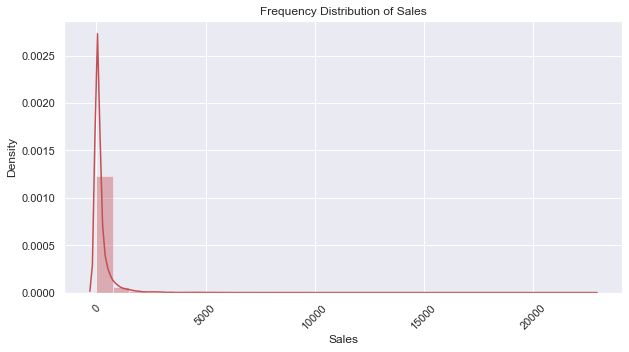

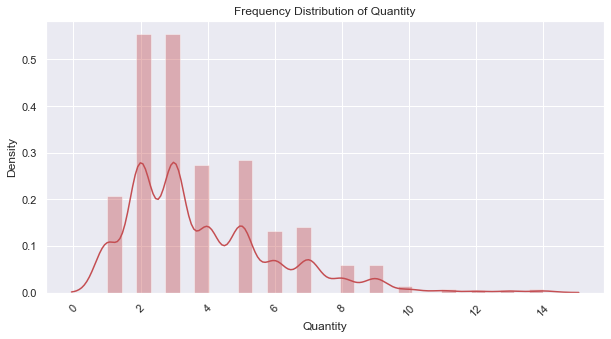

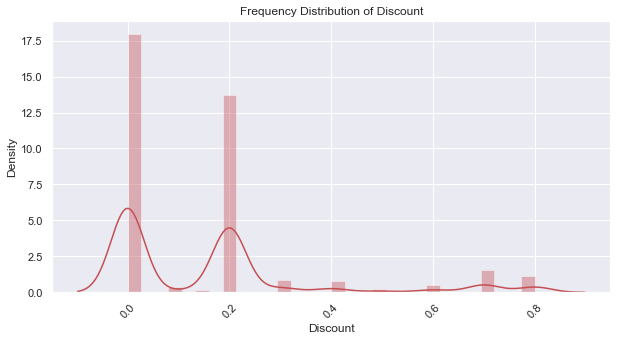

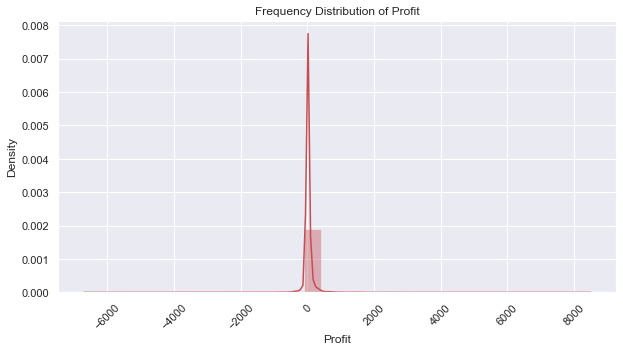

In [18]:
for i in cont_cols:
    plt.figure(figsize=(10,5))
    plt.style.use("tableau-colorblind10")
    sns.distplot(df[i],  bins=30, color="r")

    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

### Countplot

* It is used to see count-wise distribution of a categorical entities

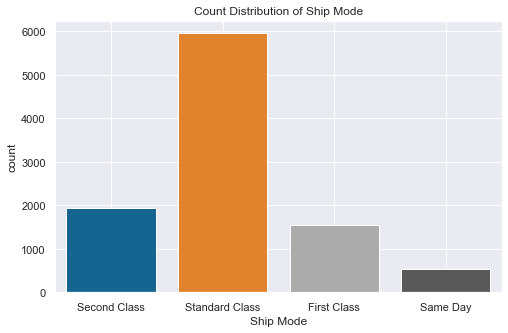

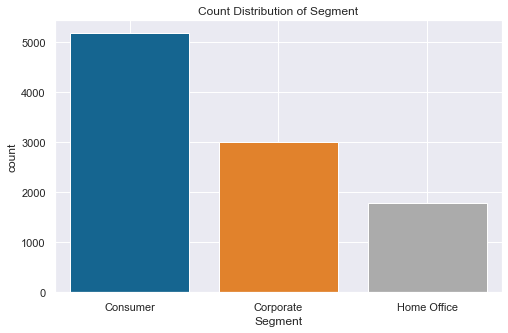

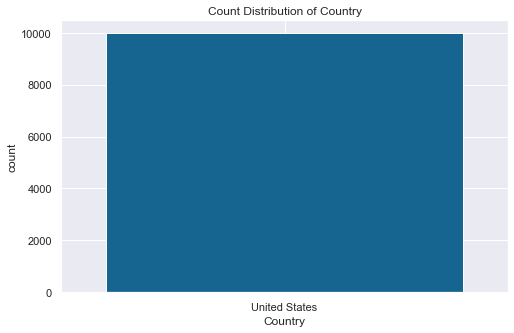

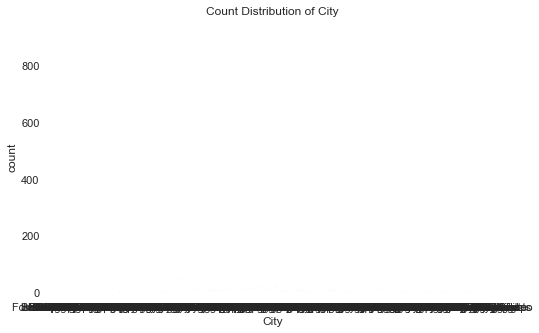

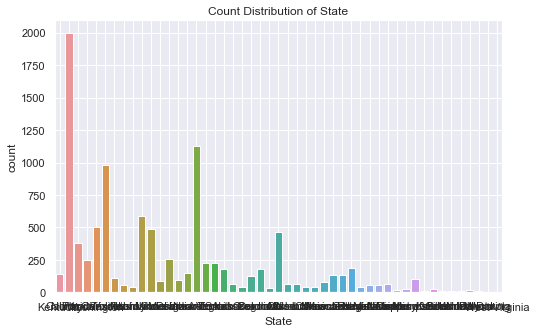

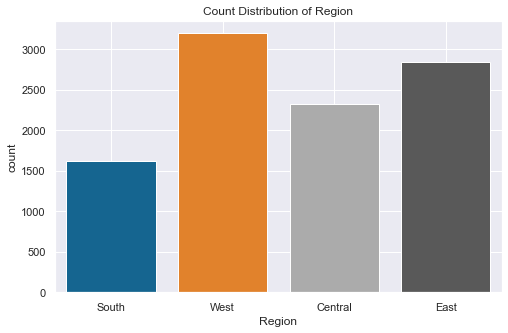

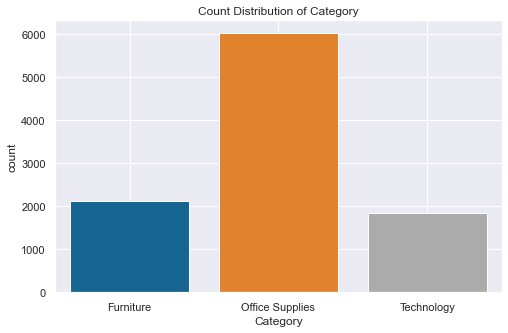

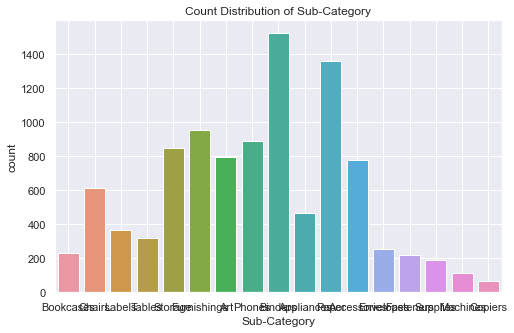

In [19]:
for i in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i])
    plt.xlabel(i)
    plt.title("Count Distribution of "+i)
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

#### Boxplot
* It is used to see quartile-wise distribution for any continuous variable
* It is also used to see the whether outliers are present in the data or not
* It is used to see quartile-wise distribution for any continuous variable against a categorical variable

* Left line of box --> 25th Percentile (Q1)
* Right line of box --> 75th Percentile (Q3)
* Middle line of box --> 50th Percentile (Median) (Q2)
* Lower Whiskers --> Q1-1.5*(Q3-Q1) --> Q1-1.5*IQR (Emperical Relationships)
* Upper Whiskers --> Q3+1.5*(Q3-Q1) --> Q3+1.5*IQR (Emperical Relationships)
* Inter Quartile Range --> IQR --> Q3-Q1 --> 75th Percentile - 25th Percentile

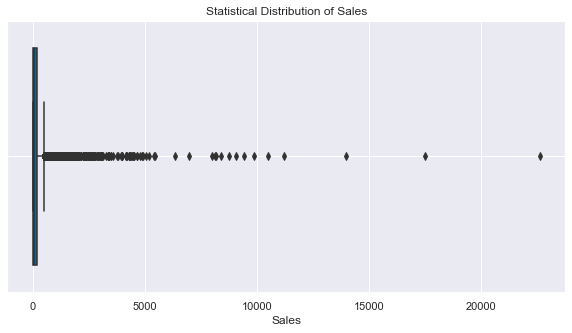

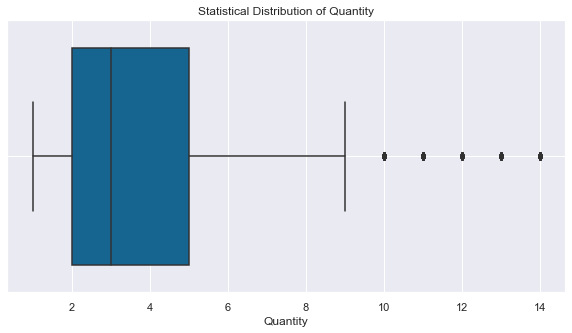

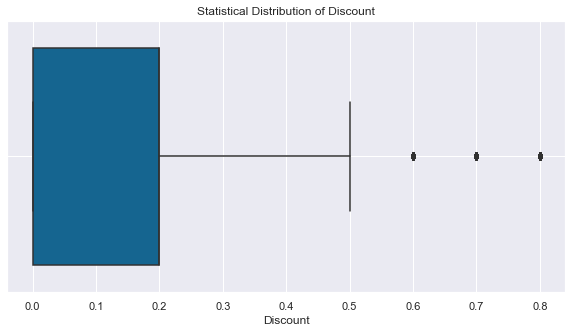

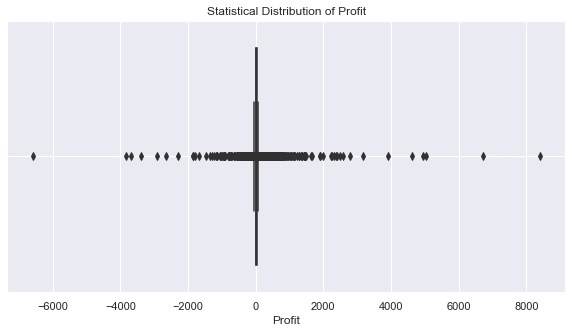

In [20]:
for i in cont_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

### Bivariate Analysis
* Analyzing two variables

#### Scatterplot
* It is used to see the relationship between two continuous variables

<Figure size 720x360 with 0 Axes>

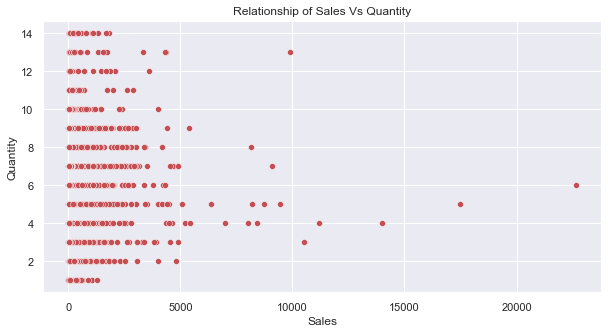

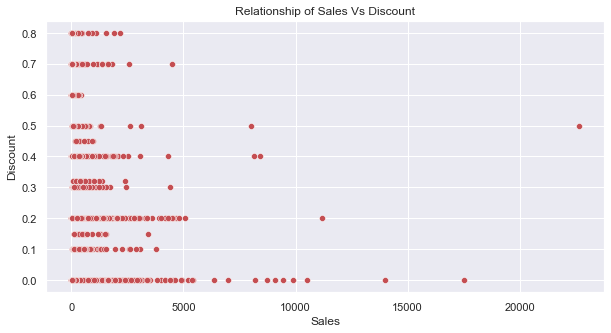

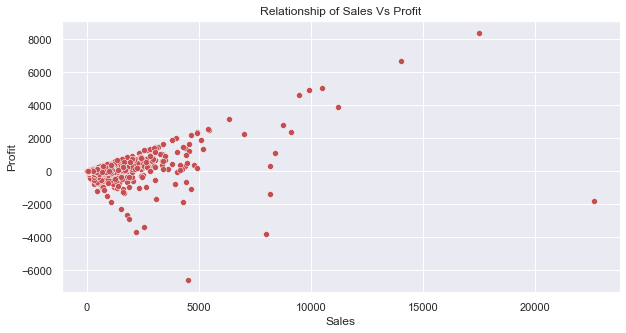

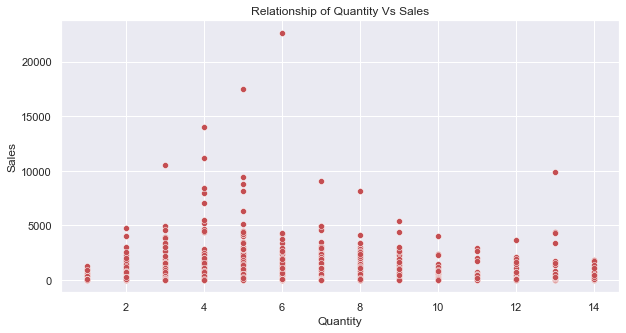

<Figure size 720x360 with 0 Axes>

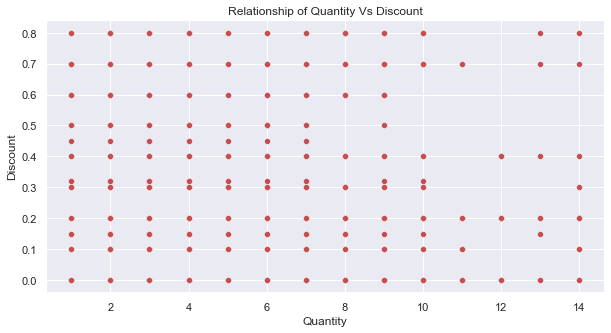

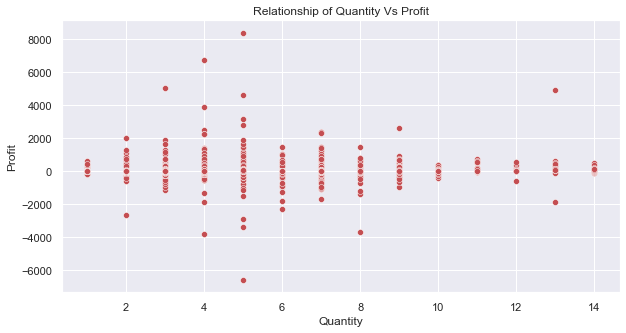

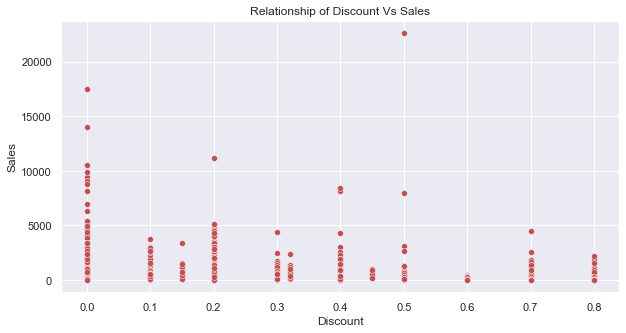

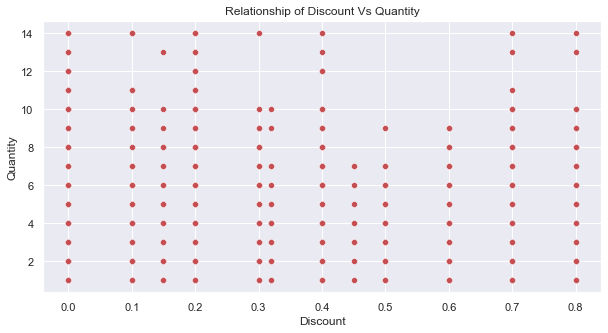

<Figure size 720x360 with 0 Axes>

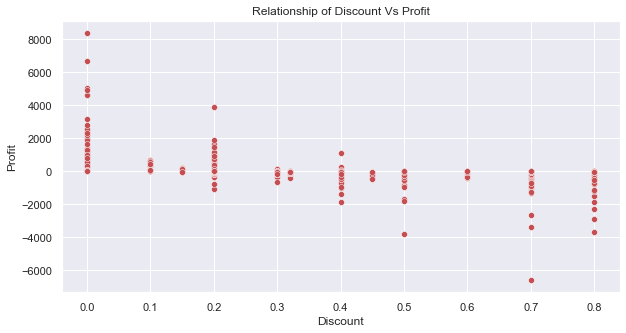

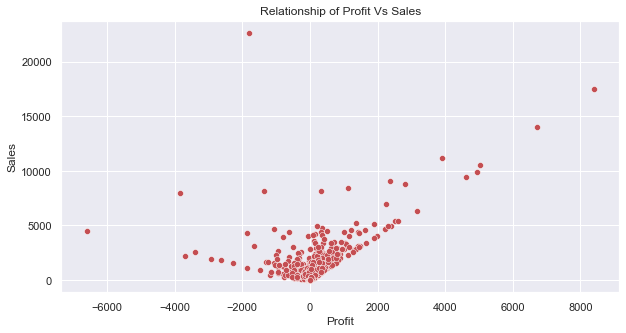

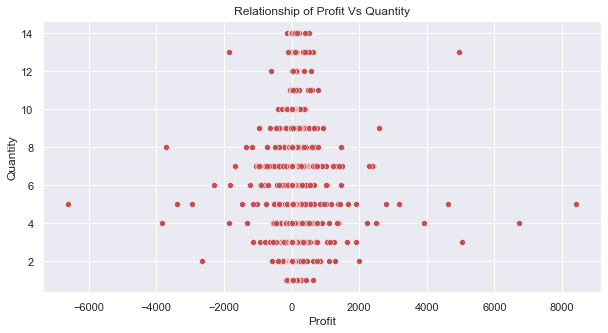

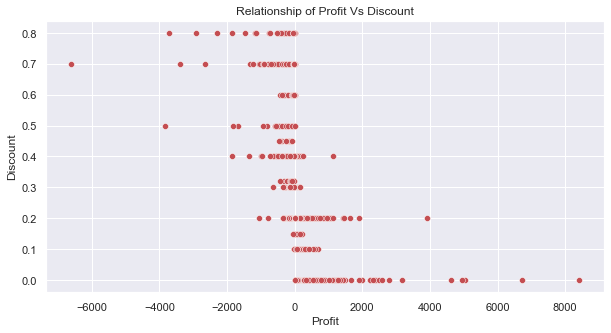

<Figure size 720x360 with 0 Axes>

In [21]:
for x in cont_cols:
    for y in cont_cols:
        plt.figure(figsize=(10,5))
        if x!=y:
            sns.scatterplot(df[x],df[y], color='r')
            plt.xlabel(x)
            plt.title("Relationship of "+x+" Vs "+y)
            plt.xticks(rotation=0)
            plt.grid(True)
            plt.show()

#### Line Graph

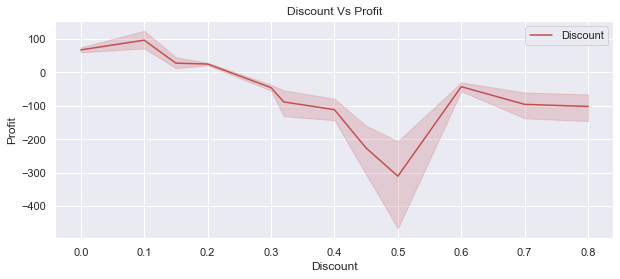

In [22]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=df , color='r',label='Discount')
plt.title('Discount Vs Profit')
plt.legend()
plt.show()

#### Pair Plot
* A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

Text(0.5, 0.98, 'Pair Plot for Continuous variables')

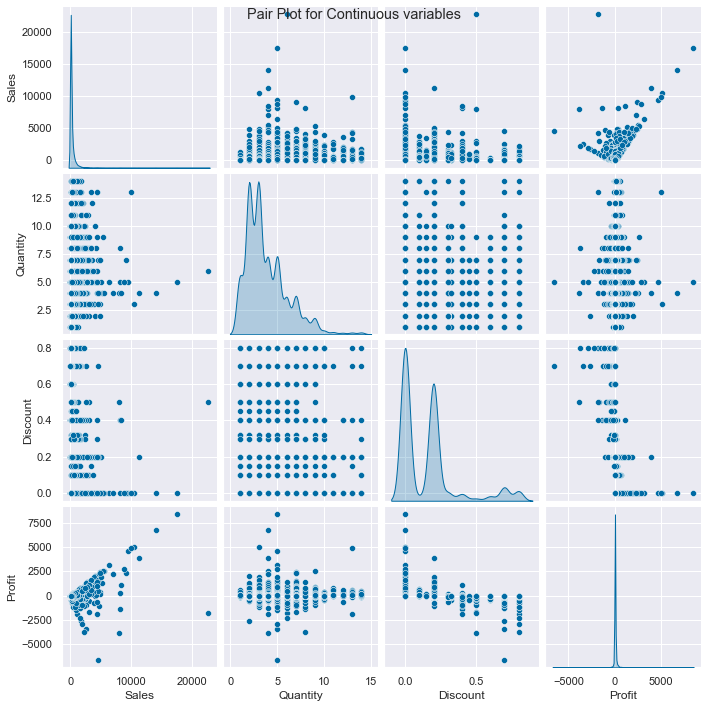

In [23]:
g= sns.pairplot(df[cont_cols], height=2.5, diag_kind = 'kde')
g.fig.suptitle("Pair Plot for Continuous variables")

### Multivariate Analysis
* Analysing multiple variables

#### Heat Map
* A heatmap is a matrix representation of the variables, which is coloured based on the intensity of the value.
* It provide us with an easy tool to understand the correlation between two entities. 

In [24]:
#Correlation Between Variables.
df[cont_cols].corr()

Sales  Quantity  Discount    Profit
Sales     1.000000  0.200730 -0.028310  0.479068
Quantity  0.200730  1.000000  0.008618  0.066228
Discount -0.028310  0.008618  1.000000 -0.219654
Profit    0.479068  0.066228 -0.219654  1.000000

<AxesSubplot:>

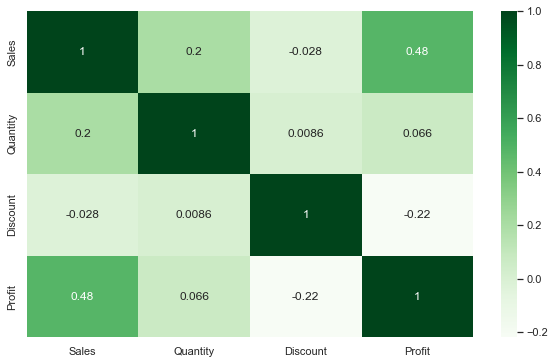

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cont_cols].corr(),annot=True, cmap='Greens')

#### Observations:
* Sales is fairly related to profit (Higher Correlation) and discount is negatively related to profit (Lesser correlation).

### Frequency of data in Categorical Column

In [26]:
fig = make_subplots(rows=2, cols=3, subplot_titles=("Category", "Sub-Category","Ship Mode","State", "Region","Segment"))

fig.add_trace(go.Histogram(x = df['Category']), row=1, col=1),
fig.add_trace(go.Histogram(x = df['Sub-Category']), row=1, col=2)
fig.add_trace(go.Histogram(x = df['Ship Mode']), row=1, col=3)
fig.add_trace(go.Histogram(x = df['State']), row=2, col=1)
fig.add_trace(go.Histogram(x = df['Region']), row=2, col=2)
fig.add_trace(go.Histogram(x = df['Segment']), row=2, col=3)

fig.update_layout(height=600, width=900, template='plotly_dark',title_text="Value Counts for each categorical attributes")

fig.show()

#### Observations:
* In category-wise, office supplies holds the majority & Technology least. 
* Top-selling sub-categories are binders, paper & copiers are least.
* Standard class ship-mode is more preferred.
* Superstores are more in west and least in south
* Consumer is the majority segment.

### 1. Analysis based on State¶

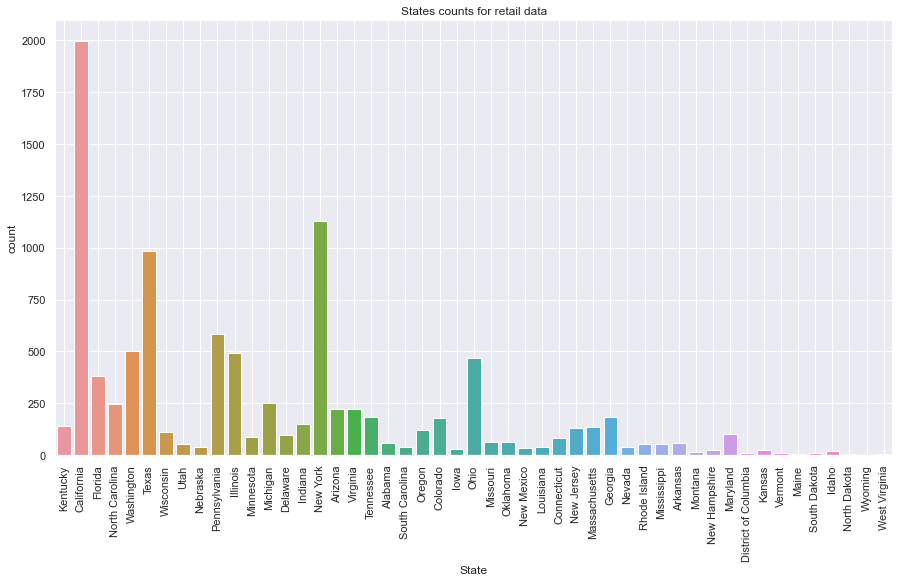

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('States counts for retail data')
plt.grid(True)
plt.show()

In [28]:
df_state = df.groupby(['State'])[['Sales','Profit','Discount']].mean()

#### Sorted by Profits

<AxesSubplot:title={'center':'Sorted by Profits'}, xlabel='State'>

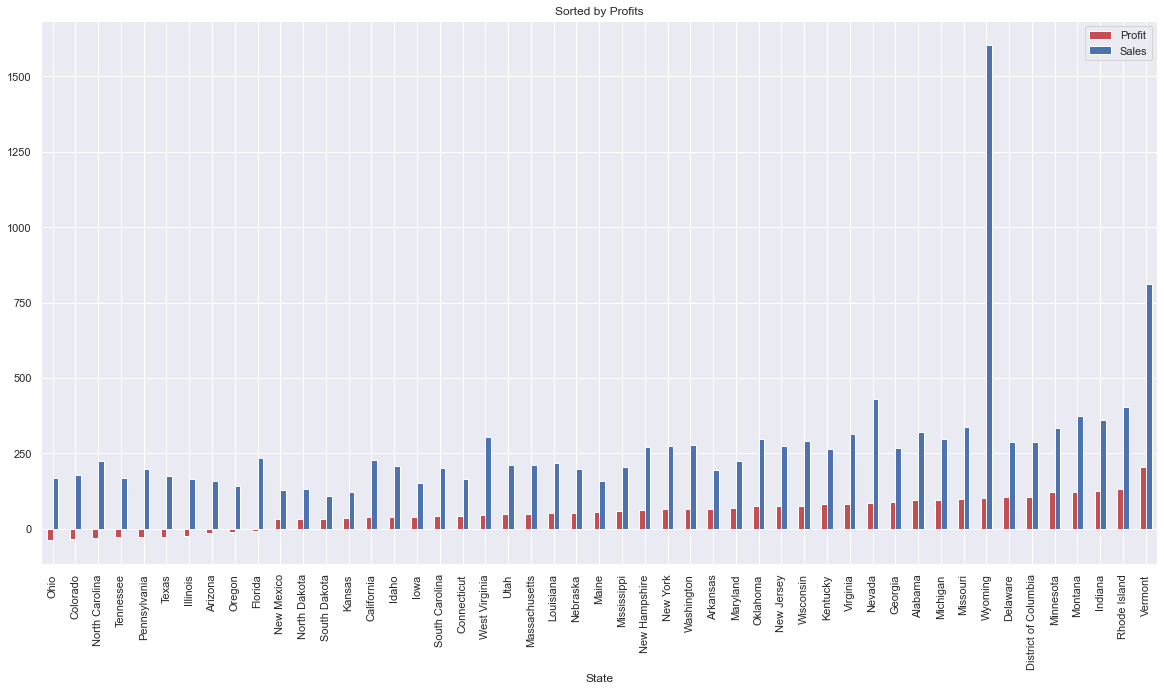

In [29]:
df_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(20,10), color=('r','b'), title='Sorted by Profits')

In [30]:
df_state.sum(axis=0)

Sales       13549.521980
Profit       2648.803603
Discount        4.077936
dtype: float64

In [31]:
df_state['Sales%'] = df_state['Sales']/135.454
df_state['Profit%'] = df_state['Profit']/26.483

In [32]:
df_state.sort_values('Profit%', ascending=False).style.bar(color='cyan')

#### Sorted by Sales

<AxesSubplot:title={'center':'Sorted by Sales'}, xlabel='State'>

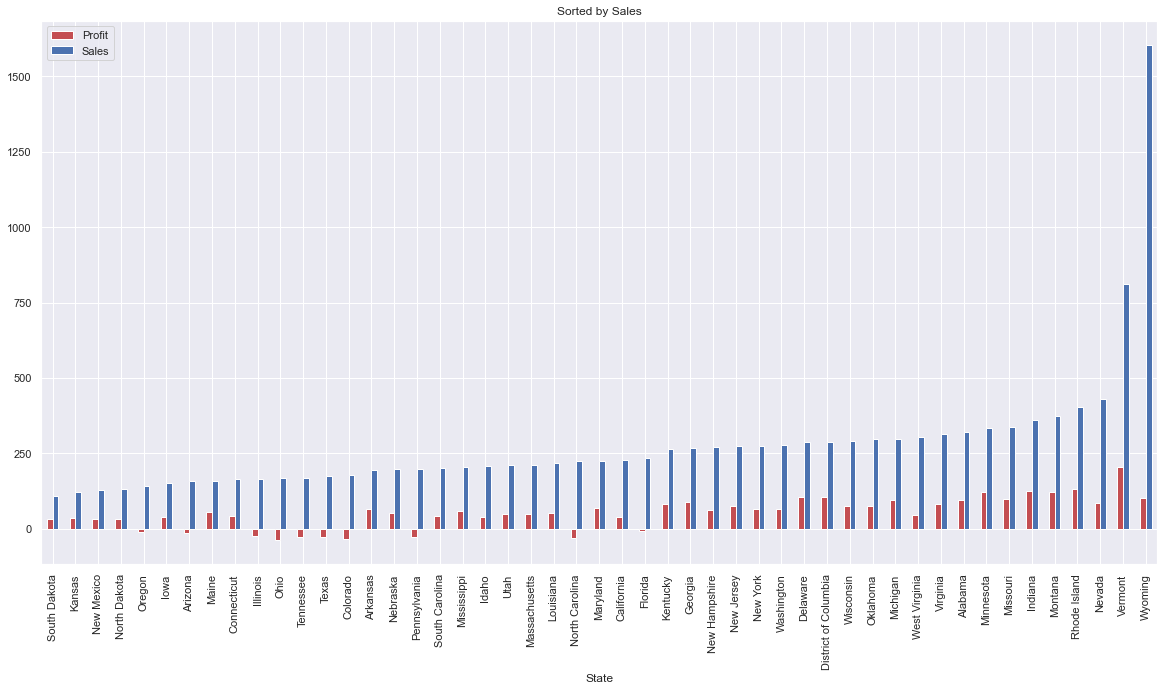

In [33]:
df_state.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(20,10),color=('r','b'), title='Sorted by Sales')

In [34]:
df_state.sort_values('Sales%', ascending=False).style.bar()

#### Sales observations for states 
* Lowest sale: South Dakota(0.81%) 
* Highest sale: Wyoming(11.84%)

The Business should focus on improving their sales in least selling states like South dakota, kansas, new mexico, north dakota, oregon where share in sales is very less. 

#### Profits observations for states 
* Lowest profit: Ohio(-1.4%) 
* Highest profit: Vermont(7.7%)

Business should focus on finding out & knowing the exact reasons of losses in several states. Company must correct the faults by taking necessary actions. If faults won't be corrected, the operations must be minimised or discontinued for those states. 

### 2. Analysis based on City

#### Finding top 25 cities with maximum products sales

In [35]:
df_city= df[["City", "Sales", 'Profit', 'Discount']].groupby(['City'], as_index=False).sum().sort_values(by=['Sales', 'Profit'],
                                                                                        ascending=False)

fig = px.bar(data_frame = df_city.head(25), x = "City", y = "Sales",
       color="City",
       hover_data=['Sales', 'Profit', 'Discount'],
       template='plotly_dark',
       title = "<b>Top 25 cities where most products are sold</b>")
fig.show()

In [36]:
df_city.reset_index().drop('index', axis = 1).head(25).style.bar()

#### Finding top 25 cities with minimum Sales of products

In [37]:
df_city = df[["City", "Sales", 'Profit', 'Discount']].groupby(['City'], as_index=False).sum().sort_values(by=['Sales', 'Profit'],
                                                                                        ascending=False)

fig = px.bar(data_frame = df_city.tail(25), x = "City", y = "Sales",
       color="City",
       hover_data=['Sales', 'Profit','Discount'],
       template='plotly_dark',
       title = "<b>Bottom 25 cities where less products are sold</b>")
fig.show()

In [38]:
df_city.reset_index().drop('index', axis = 1).tail(25).style.bar()

#### Observations
* New York has the most sales and profit.
* Abilene has the least sales
* Romeoville, Deer Park, Missouri City, Abilene and many other cities are in loss. 
* Inspite of having high sales at cities like Philadelphia, Houston and Chicago, profits are in negative.
* There is a huge disparity between the cities with highest sales and lowest sales.
* At few cities, inspite of high discounts on products, sales are less & even profit is in negative, e.g. Abilene

### 3. Analysis based on Region¶

In [39]:
fig = px.histogram(df, x = "Region", color='Ship Mode')
fig.update_layout(height=300, width=500, template='plotly_dark', title_text="<b>Counts of Ship Mode in Regions</b>")
fig.show()

In [40]:
df_region2 = df.groupby(['Region'])[['Sales','Profit','Discount']].mean()
df_region2

Sales     Profit  Discount
Region                                  
Central  215.947759  17.100421  0.240250
East     238.465798  32.163905  0.145343
South    241.803645  28.857673  0.147253
West     227.134234  33.915056  0.109649

In [41]:
color1= ['green', 'yellow','orange','magenta']
color2= ['red', 'cyan','blue']

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

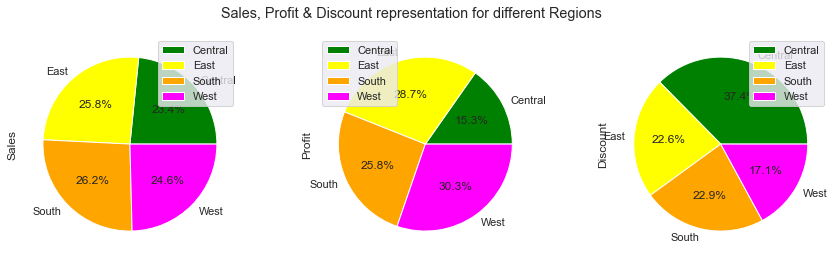

In [42]:
df_region2.plot.pie(subplots=True, figsize=(15,4), autopct='%1.1f%%', label=df_region2.index.values, colors=color1,
                   title='Sales, Profit & Discount representation for different Regions')

In [43]:
df_region2.sum(axis=0)

Sales       923.351437
Profit      112.037055
Discount      0.642495
dtype: float64

In [44]:
df_region2['Sales%'] = df_region2['Sales']/9.224
df_region2['Profit%'] = df_region2['Profit']/1.119
df_region2['Discount%']= df_region2['Discount']/0.0064

In [45]:
df_region2.sort_values('Profit', ascending=False).style.bar(color='cyan')

#### Observations for sales
* Lowest sales: Central(23.41%) 
* Highest sales: South(26.21%)

Although sales are fine in all the regions since the variation range is less, however steps can still be taken to improve the sales in Central zone.

#### Observations for profits
* Lowest profit: Central(15.28%) 
* Highest profit: West(30.30%)

West zone is giving almost double the profit as compared to the central zone, so the company should take steps to analyze & improve the sales and profits for the central regions. 

### 4. Analysis based  on Ship Mode

Text(0.5, 0.98, 'Pair Plot of Continuous variables for Ship-Modes')

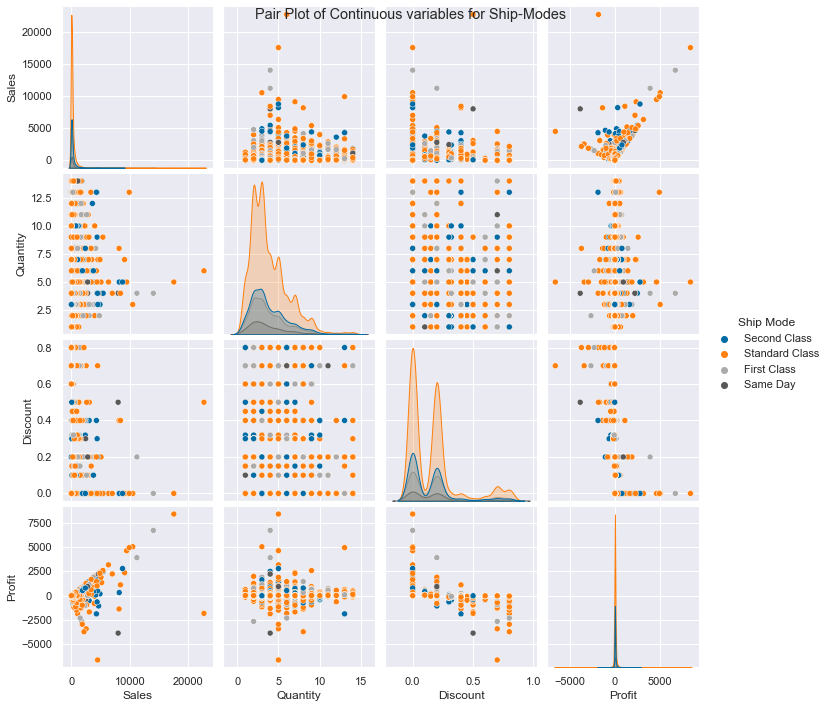

In [46]:
s= sns.pairplot(df, hue='Ship Mode', height=2.5, diag_kind = 'kde')
s.fig.suptitle("Pair Plot of Continuous variables for Ship-Modes")

In [47]:
fig = px.histogram(df, x = "Ship Mode", color='Segment')

fig.update_layout(height=300, width=500,
                  template='plotly_dark',
                  title_text="<b>Counts of Segments in Ship Mode</b>")

fig.show()

In [48]:
df_shipmode=df.groupby(['Ship Mode'])[['Sales','Profit','Discount']].mean()
df_shipmode

Sales     Profit  Discount
Ship Mode                                      
First Class     228.614490  31.850134  0.164587
Same Day        236.755950  29.283924  0.152675
Second Class    236.320229  29.543617  0.138697
Standard Class  227.928858  27.534715  0.160222

<AxesSubplot:xlabel='Ship Mode'>

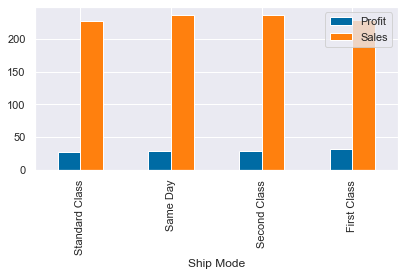

In [49]:
df_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(6.5,3))

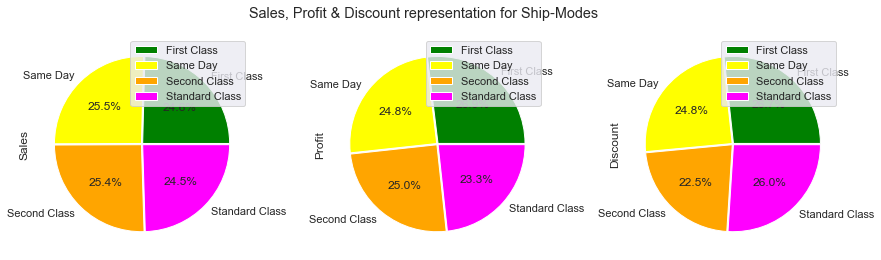

In [50]:
df_shipmode.plot.pie(subplots=True, figsize=(15,4), labels=df_shipmode.index, autopct='%1.1f%%', explode= (0.01,0.01,0.01,0.01),
                    colors=color1, title='Sales, Profit & Discount representation for Ship-Modes')
plt.show()

In [51]:
df_shipmode.sum(axis=0)

Sales       929.619527
Profit      118.212390
Discount      0.616181
dtype: float64

In [52]:
df_shipmode['Sales%'] = df_shipmode['Sales']/9.285
df_shipmode['Profit%'] = df_shipmode['Profit']/1.181

In [53]:
df_shipmode.sort_values('Profit%').style.bar(color='green')

#### Observations on sales
Lowest sales: Standard Class(24.55%)
Highest sales: Same Day(25.50%)

#### Observations on profits
Lowest profit: Standard Class(23.31%)
Highest profit: First class(26.97%)

Although there is very little differences between sales & profits of different classes of ship modes, still, maximum and minimum can be ascertained on seeing these analysis.

### 5. Analysis based on segment

Text(0.5, 0.98, 'Pair Plot of Continuous variables for Segments')

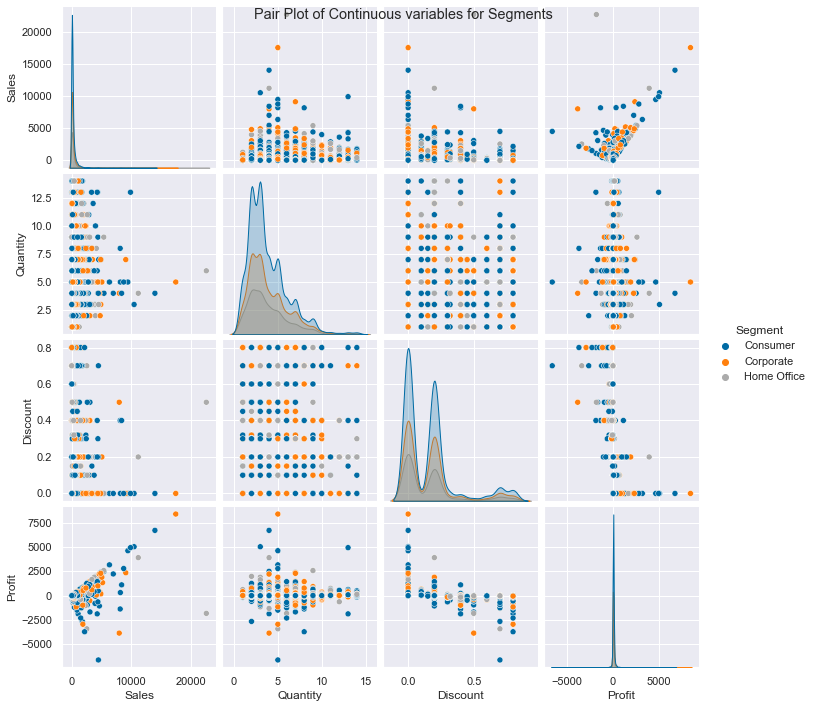

In [54]:
m= sns.pairplot(df, hue='Segment', height=2.5)
m.fig.suptitle("Pair Plot of Continuous variables for Segments")

In [55]:
df_segment = df.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

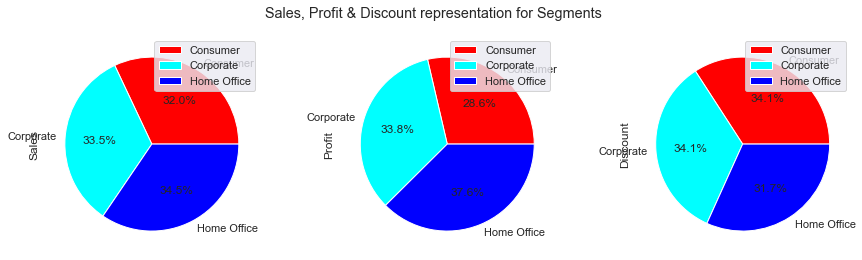

In [56]:
df_segment.plot.pie(subplots=True, figsize=(15,4), labels=df_segment.index, autopct='%1.1f%%', colors=color2,
                    title='Sales, Profit & Discount representation for Segments')

<AxesSubplot:title={'center':'Profit & Sales for different segments'}, xlabel='Segment'>

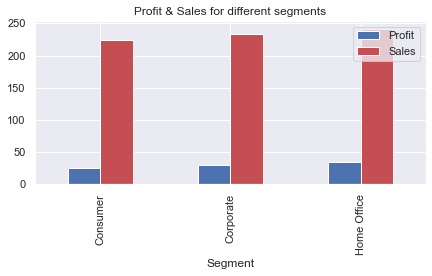

In [57]:
df_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(7,3), color=('b','r'), grid=True, 
                                                          title='Profit & Sales for different segments')

In [58]:
df_segment.sum(axis=0)

Sales       699.462591
Profit       90.228908
Discount      0.463676
dtype: float64

In [59]:
df_segment['Sales%'] = df_segment['Sales']/6.985
df_segment['Profit%'] = df_segment['Profit']/0.9011

In [60]:
df_segment.sort_values('Profit').style.bar(color='cyan')

#### Observation on sales
Lowest sales: Consumer(32.06%)
Highest sales: Home Office(34.54%)

#### Observation on profits
Lowest profit: Consumer(28.68%)
Highest profit: Home Office(37.55%)

* Although there is very little differences between sales & profits of different segments, still, maximum and minimum can be ascertained on seeing these analysis.

* The corporates are on the second position for both sales & profits with Home office leading the drive in the best way for the company

### 6. Analysis of Category

In [61]:
category_df = df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum()
category_df

Profit        Sales  Quantity
Category                                           
Furniture         18421.8137  741306.3133      8020
Office Supplies  122291.7128  718492.0840     22859
Technology       145454.9481  836154.0330      6939

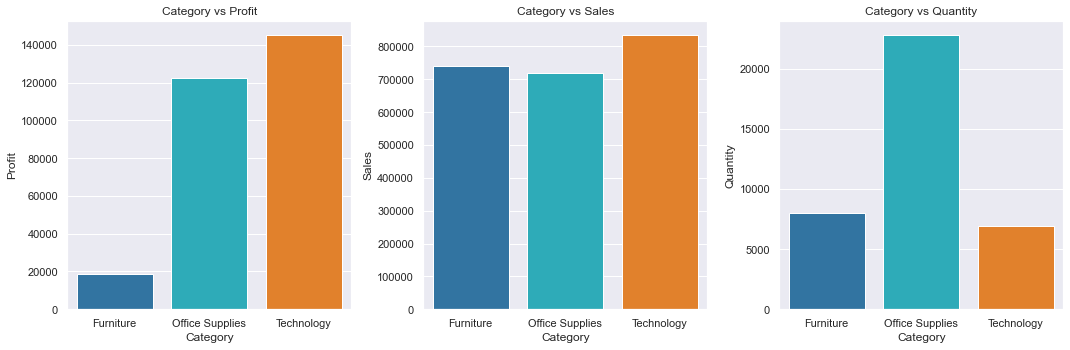

In [62]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette=['tab:blue', 'tab:cyan', 'tab:orange'],
           ax=axes[0])
sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette=['tab:blue', 'tab:cyan', 'tab:orange'],
           ax=axes[1])
sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette=['tab:blue', 'tab:cyan', 'tab:orange'],
           ax=axes[2])

plt.tight_layout(pad=1)

#### Observations:
* Although Technology has less quantity, but its having highest sales as well as profit. So, focusing on Technology, would be a better decision for the business growth.

### 7. Analysis of Sub Category

Text(0.5, 1.0, 'Count plot for sub-Category')

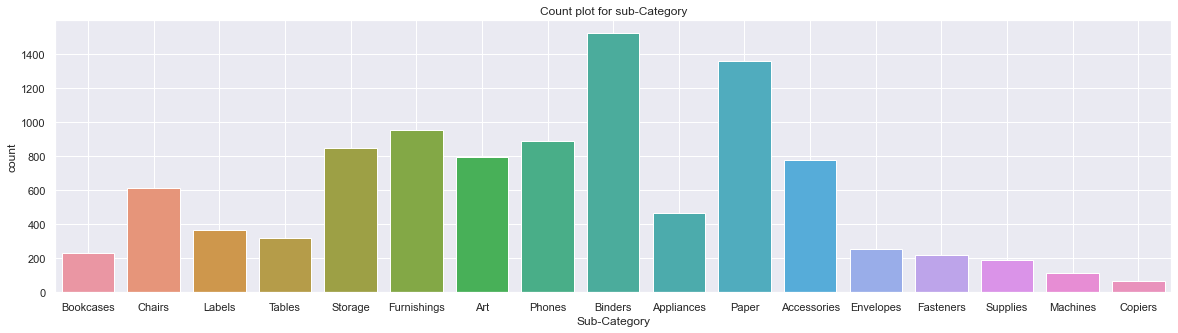

In [63]:
plt.figure(figsize=(20,5))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=0)
plt.grid(True)
plt.title('Count plot for sub-Category')

In [64]:
df_subcat = df.groupby(['Sub-Category'])[['Sales','Profit']].mean()

#### Product Sub-category vs Profit

In [65]:
Prod_subcategory= df[["Sub-Category", "Profit"]].groupby(['Sub-Category'], as_index=False).sum().sort_values(by='Profit',
                                                                                        ascending=True)
fig = px.bar(data_frame = Prod_subcategory,
             x = "Sub-Category",
             y = "Profit",
             color="Sub-Category",
             title = "<b>Product Sub-Category Vs Profit</b>")
fig.show()

In [66]:
Prod_subcat1= df[["Sub-Category", "Sales"]].groupby(['Sub-Category'], as_index=False).sum().sort_values(by='Sales',
                                                                                        ascending=False)

fig = px.bar(data_frame = Prod_subcat1,
             x = "Sub-Category",
             y = "Sales",
             color="Sub-Category",
             title = "<b>Product Sub-Category Vs Sales</b>")
fig.show()

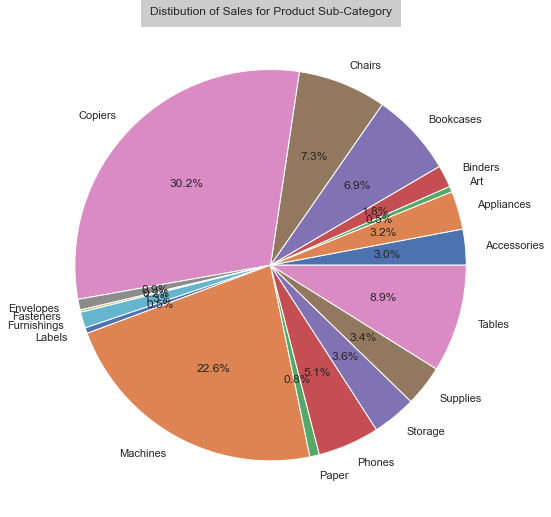

In [67]:
plt.figure(figsize=(13,9))
plt.pie(df_subcat['Sales'], labels = df_subcat.index, autopct='%1.1f%%')
plt.title("Distibution of Sales for Product Sub-Category", bbox={'facecolor':'0.8', 'pad':10})
plt.show()

#### Profits & Sales for sub categories

<AxesSubplot:title={'center':'Profits & Sales for sub categories'}, xlabel='Sub-Category'>

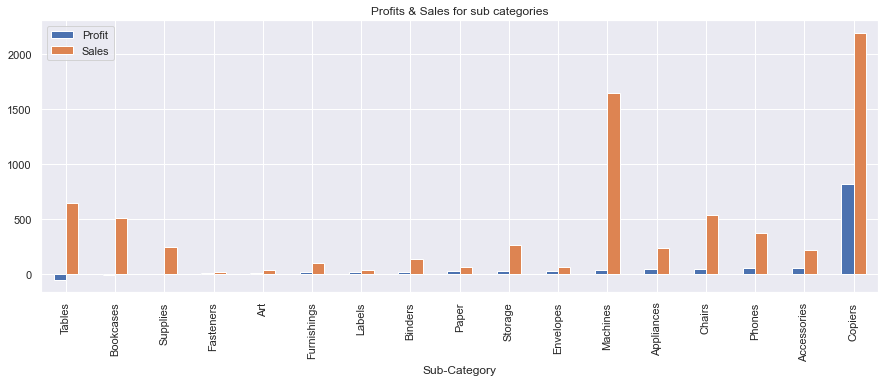

In [68]:
df_subcat.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,5), title='Profits & Sales for sub categories')

In [69]:
df_subcat.sum(axis=0)

Sales     7292.570920
Profit    1095.389811
dtype: float64

In [70]:
df_subcat['Sales%'] = df_subcat['Sales']/72.915
df_subcat['Profit%'] = df_subcat['Profit']/10.952

In [71]:
df_subcat.sort_values('Sales', ascending=False).style.bar()

In [72]:
df_subcat.sort_values('Profit', ascending=False).style.bar(color='cyan')

### Sales
* Lowest sales: Fasteners(0.2%)
* Highest sales: Copiers(30.16%)

### Profit
* Lowest profit: Tables(-5.07%)
* Highest profit: Copiers(74.7%)


* Looking at the statistical figures, we can find that the company has maximum sales and profits for 'copiers'. 
* The company should look upon the matter & take steps for sub-category 'Tables' as it's contributing to more losses.
* steps should be taken to improve profits for other sub categories as well.
* 'Machine has second highest sales, but profit is very less compare to 'Copiers'.

### Final Conclusion

 #### 1. Top 5 sub-categories which generates more profit
* Copiers
* Accessories
* Phones
* Chairs
* Appliances

#### 2. Category which has highest sales & profits
* Technology

#### 3. Segment which has highest sales & profits
* Home First class

#### 4. Ship Mode which has highest profits
* First class

#### 5. Top 5 cities which has highest no of sales
* New York City
* Los Angeles
* Seattle
* San Francisco
* Philadelphia

#### 6. Buttom 5 cities cities has least numbers of sales
* Ormond Beach
* Pensacola
* Jupiter
* Elyria
* Abilene

#### 7. State with highest & least profits
* 'Vermont' state has Highest profit & 'Ohio' has least profit

#### Consider following recommendations for higher profit:-

* Focus should be on category 'Technology' like Phones as they are highest selling and most profitable items. Bundle them with the less profitable products to offset the losses like tables and suppplies.

* Selling bookcases, tables and supplies result in losses, so SuperStores should plan to bundle them together with High Selling or Profitable sub-category such as Machines, Copiers, Phones etc.

* For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so creating a Home Office Catalog with products used for offices such as paper, chairs, phone, copiers, storage,machines would result in better profits.

* Target consumer/customers from East and West region of top 10 cities with most profits, with special promotions and advertisments for copiers, phones, accessories etc.

# Thank you!!!!